# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

#### Importar a Base de dados

In [41]:
#Import Pandas

import pandas as pd

#Leitura de Arquivo e exibição (neste projeto os dados já foram tratados (missing, remoção de colunas e etc))

df = pd.read_csv('advertising.csv')
display(df)
print(df.info())

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

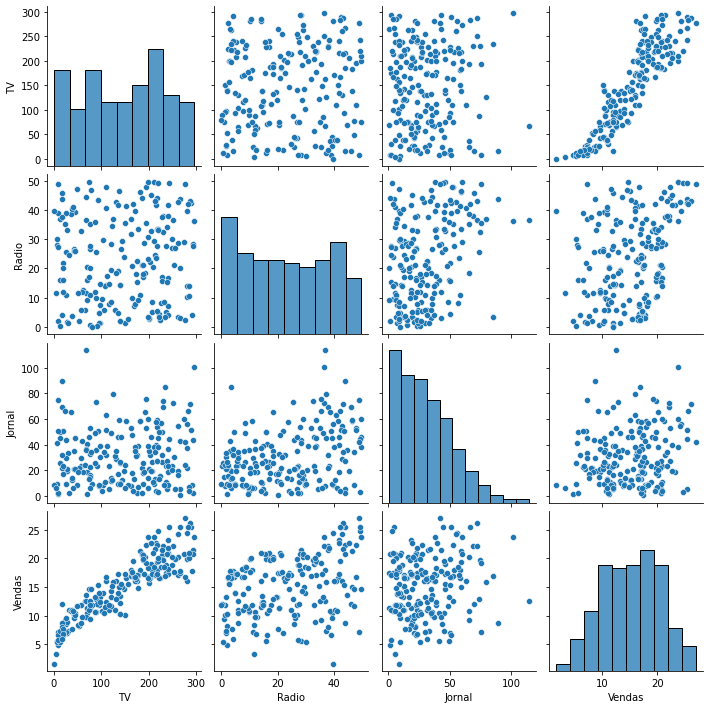

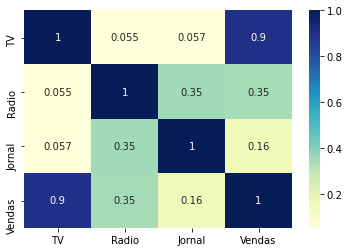

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

#Vamos criar 2 gráficos (uma analise com pairplot e posteriormente um heatmap analisando a correlação de vendas)

sns.pairplot(df)
plt.show()

#Vamos criar um mapa de calor para facilitar a compreensão da correção de vendas
sns.heatmap(df.corr(), cmap ='YlGnBu', annot=True) #Exibição numérica deverá parecer
plt.show()

### Com isso podemos concluir que:

* Existe uma correlação forte entre Vendas x TV;
* Existe uma correlação fraca entre Vendas x Rádio;
* Quase não há correlação entre Vendas x Jornal (ou seja não vale investir tanto).

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [43]:
#Import Train_split sklearn

from sklearn.model_selection import train_test_split

#Separar os dados X dos dados Y (saída a ser predita - ou seja as vendas)

x = df.drop('Vendas', axis=1)
y = df['Vendas']

#Exibição de dados

display(x)
display(y)

#Separar dados de treino 70% e teste 30%

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

,TV,Radio,Jornal
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Vendas, Length: 200, dtype: float64

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

#Treino IA - regressão Linear
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

#Treino IA - árvore de decisão
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [45]:
# Agora vamos testar ambas as IAs e definir qual algoritmo obteve melhor resultado

test_pred_lin = lin_reg.predict(x_test)
test_pred_rf = rf_reg.predict(x_test)

#Calcular o R² - quanto mais próximo de 1 melhor

r2_lin = metrics.r2_score(y_test, test_pred_lin)
r2_rf = metrics.r2_score(y_test, test_pred_rf)

#Exibição de resultados

print(f"R² da Regressão Linear: {r2_lin}")
print(f"R² da Árvore de Decisão: {r2_rf}")

R² da Regressão Linear: 0.831678164511009
R² da Árvore de Decisão: 0.9294025193911344


#### Visualização Gráfica das Previsões

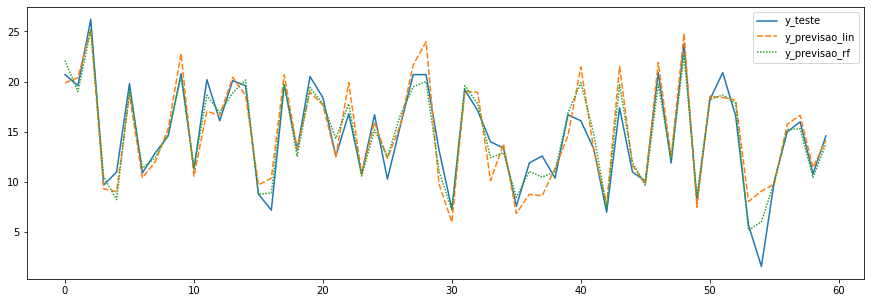

,y_teste,y_previsao_lin,y_previsao_rf
0,20.7,19.872692,22.104
1,19.6,20.401692,19.013
2,26.2,25.200627,25.180
3,9.7,9.334371,10.528
4,11.0,9.042406,8.253
5,19.8,18.679377,19.173
6,10.9,10.420856,11.393
7,12.9,12.031173,12.422
8,14.6,15.327000,14.764
9,20.8,22.790247,20.512


In [46]:
#Criamos um dataframe para exibição dos calculos e os dados dos testes

df_result = pd.DataFrame()
df_result['y_teste'] = y_test
df_result['y_previsao_lin'] = test_pred_lin
df_result['y_previsao_rf'] = test_pred_rf
df_result = df_result.reset_index(drop=True)
fig = plt.figure(figsize = (15, 5))
sns.lineplot(data=df_result)
plt.show()
display(df_result)

#### Qual a importância de cada variável para as vendas?

<AxesSubplot:ylabel='0'>

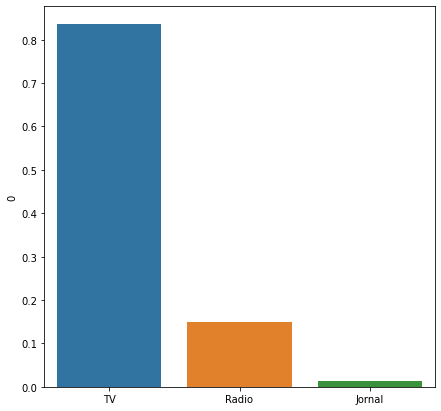

In [47]:
#Exibição gráfica dos pesos (importância de cada investimento para as vendas)

importances_features = pd.DataFrame(rf_reg.feature_importances_, x_train.columns)
plt.figure(figsize=(7,7))
sns.barplot(x=importances_features.index, y=importances_features[0])

In [48]:
# Por fim vamos prever novas vendas com base no arquivo novos

df_new = pd.read_csv('novos.csv')
display(df_new)
#Prevendo novos valores de venda
pred_rf = rf_reg.predict(df_new)
print(pred_rf)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.657  8.852 20.714]
